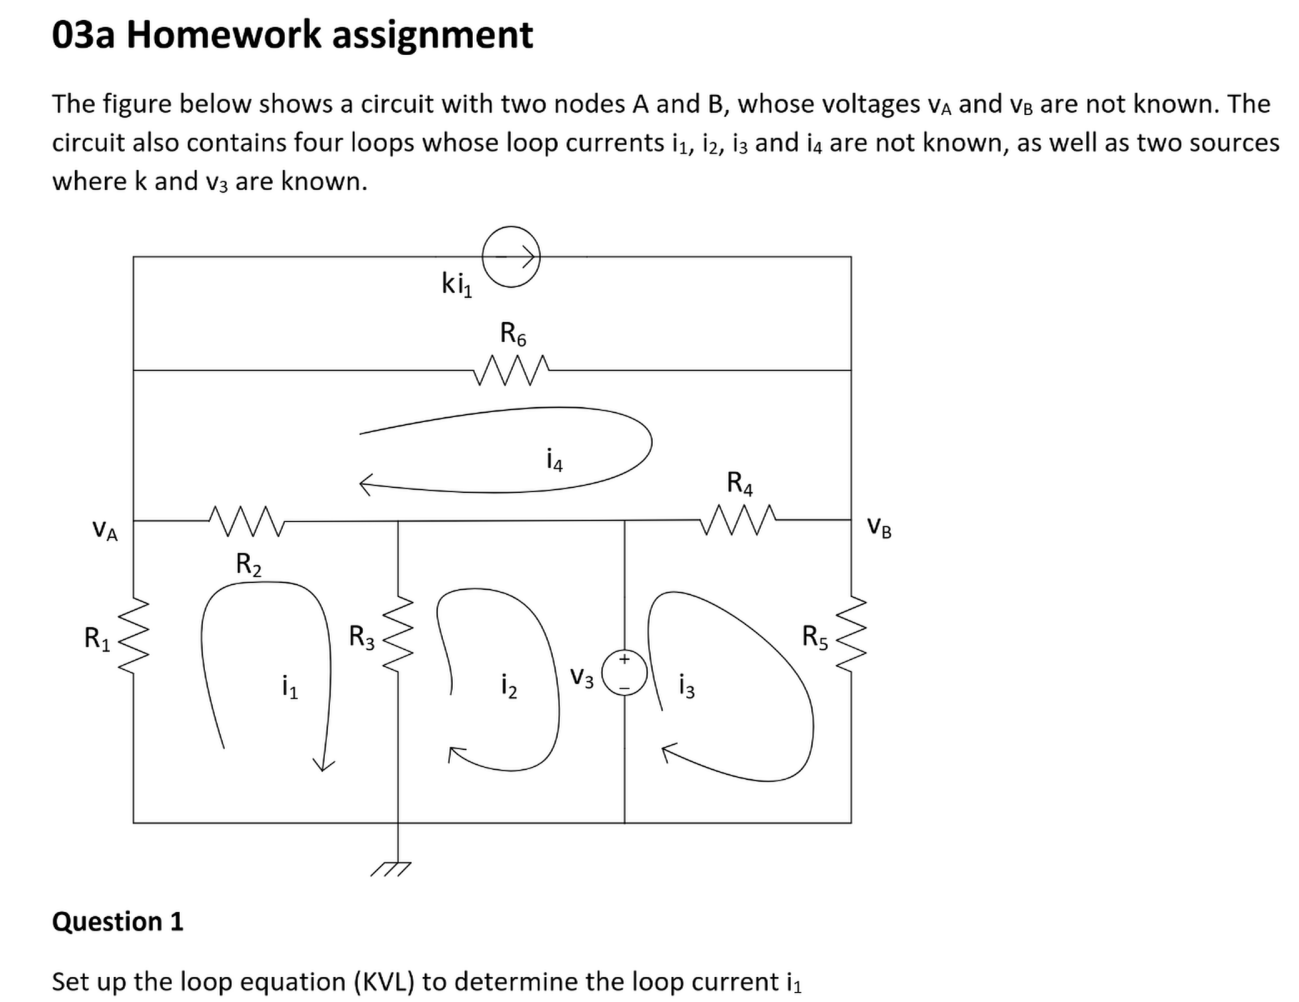

Looking at the voltage source. we can notice the resistor polarity: \
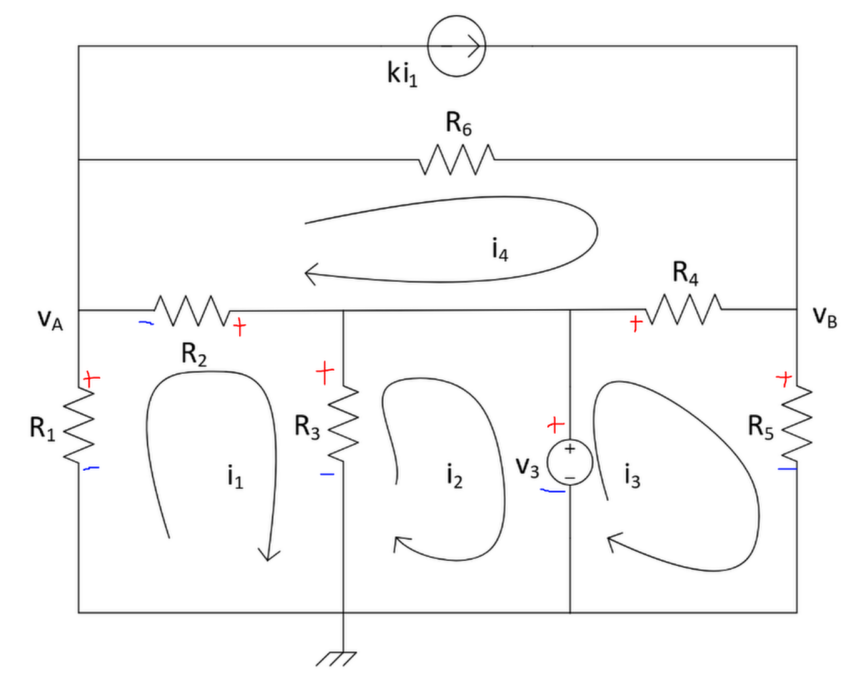 \
And according to kirchoff, then a mesh has a voltage sum of 0. Therfore: \
$V_1+V_2-V_3=0$ \
Where $V_n=R_n \cdot I_1$ \
Now because $V=IR$, then insert and find $I_1$: \
$R_1\cdot I_1 + R_2 \cdot (I_4 - I_1) - R_3 \cdot (I_1 - I_2) = 0$

In [1]:
# from sympy import *

# I1, I2, I3 = symbols('I1 I2 I3')

# sol = solve([
#     Eq(9*I1 - 4*I2, 65),
#     Eq(8*I1 - 15*I2 + 2*I3, 0),
#     Eq(2*I2 - 7*I3, 50)
# ], [I1, I2, I3])

# print(sol)  # {I1: 9, I2: 4, I3: -6}


In [2]:
from sympy import *

R1, R2, R3, I4, I1, I2 = symbols('R1 R2 R3 I4 I1 I2')

eq = Eq(R1*I1 + R2*(I4-I1) - R3*(I1 - I2), 0)

sol = solve(eq, I1)  
expr = sol[0]
print(latex(Eq(I1, expr)))

I_{1} = \frac{I_{2} R_{3} + I_{4} R_{2}}{- R_{1} + R_{2} + R_{3}}


Thus $I_{1} = - \frac{I_{2} R_{3}}{R_{1} + R_{2} - R_{3}}$

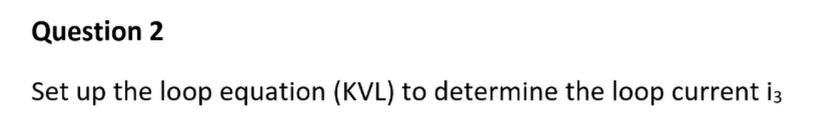 \
$V_3$ increases voltage, $R_4$ and $R_5$ decreases votlage. \
Therefore, the formula is $V_3-V_4-V_5=0$, where $V_3$ is the voltage source, and $V_4, V_5$ is the voltage drop of the resistors. \
Now insert $V=IR$ and find $I_3$  \
Therefore: $ V_3 -R_4(I_3-I_4) - R_5\cdot I_3 = 0$

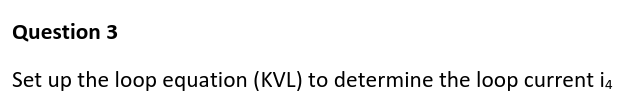 \
The polarity doesn't matter that much in this, so i'll just write it like this: \
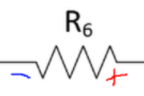 \
Now the same idea as before: \
$V_6+V_4-V_2=0$ \
insert $V=IR$ and find $I_4$

In [3]:
from sympy import *

R6, R4, R2, I4, I3, I1 = symbols('R6 R4 R2 I4 I3 I1')

eq = Eq(R6*I4+R4*(I4-I3)-R2*(I4-I1), 0)

sol = solve(eq, I4)  
expr = sol[0]
print(latex(Eq(I4, expr)))

I_{4} = \frac{- I_{1} R_{2} + I_{3} R_{4}}{- R_{2} + R_{4} + R_{6}}


Thus it is: $I_{4} = \frac{- I_{1} R_{2} + I_{3} R_{4}}{- R_{2} + R_{4} + R_{6}}$ \
or: $R_6\cdot I_4 + R_2(I_4-I_1) + R_4(I_4-I_3)=0$

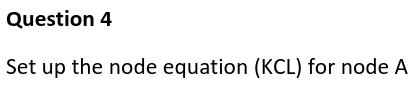 \
First reform Ohms law: $V=IR \rightarrow I=\frac{V}{R}$ \
Now kirchoff says: $\sum I = 0$ at an intersection, therefore: \
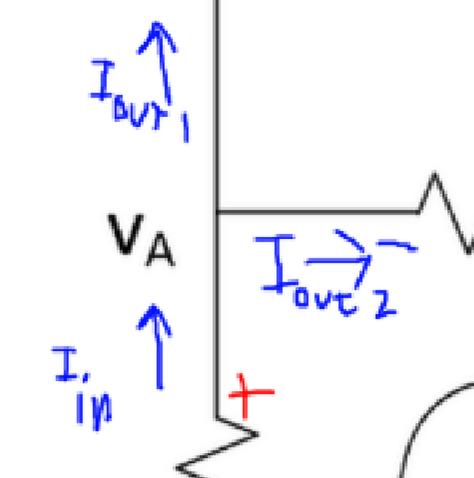  \
$I_{in}+I_{out1}+I_{out2} +k\cdot I_1= 0$ \
Since $R_1$ is assumed to increase voltage, then $I_{in} = \frac{(0-V_A)}{R_1}$ \
The same assumption for $R_2$, therefore $I_{out2}=\frac{(V_A-V_3)}{R_2}$. \
Yet again, the same assumption for $R_6$ \
I'll choose the resistor to voltage source, therefore: $I_{out1}=\frac{(V_B-V_A)}{R_6}$ \
$I=(V_{\text{from}}-V_{\text{to}})/R$ \
Now combine and we have the answer: \
$\frac{(0-V_A)}{R_1} + \frac{(V_A-V_3)}{R_2} + \frac{(V_B-V_A)}{R_6} + k\cdot I_1 = 0$ 


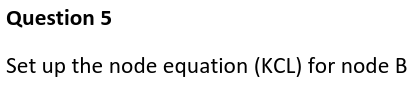 \
Just have to use this fomula and priciple again: $I=(V_{\text{from}}-V_{\text{to}})/R$ \
$\frac{V_B}{R_5} + \frac{V_B-V_3}{R_4} + \frac{V_B-V_A}{R_6} - k\cdot I_1 = 0$

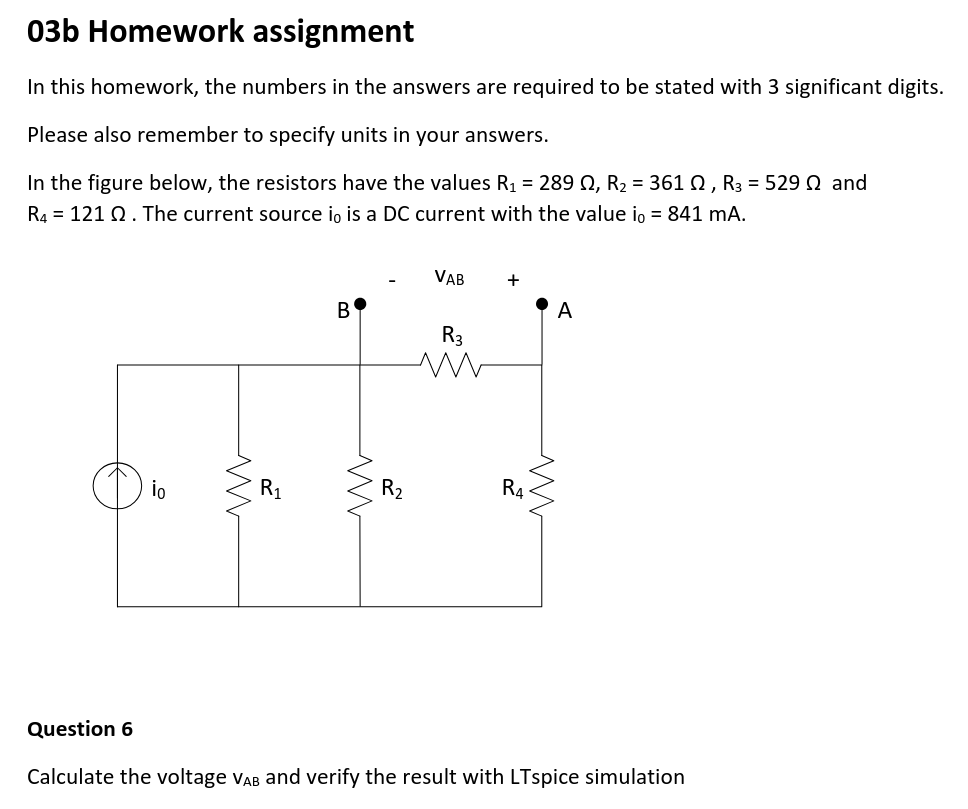 \
Time constrained! Gotta go fast

In [4]:
import sympy as sp

# ohms
R1 = 289
R2 = 361
R3 = 529
R4 = 121

i0 = 0.841 # A

VA, VB = sp.symbols('VA VB', real=True)
eqA = sp.Eq(VA/R4 + (VA - VB)/R3, 0)# KCL 1
eqB = sp.Eq(VB/R1 + VB/R2 + (VB - VA)/R3, i0) # KCL 2

sol = sp.solve((eqA, eqB), (VA, VB))
VA_val, VB_val = sol[VA], sol[VB]
V_ab = VA_val - VB_val

print(f"V_A = {N(VA_val, 3)}V")
print(f"V_B = {N(VB_val, 3)}V")
print(f"V_AB = {N(V_ab, 3)}V")

V_A = 20.2V
V_B = 108V
V_AB = -88.1V


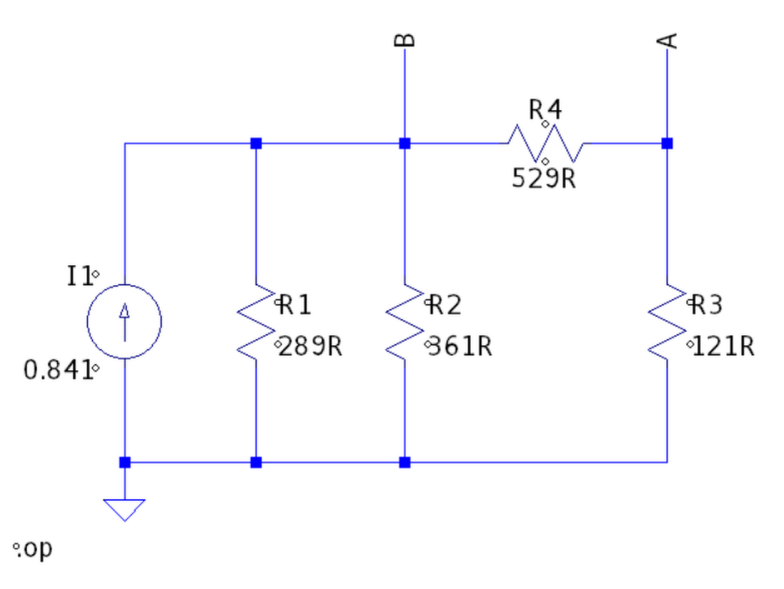 \
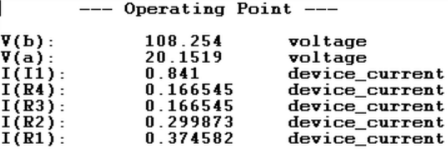 \
The difference in voltage between A and B is $V_{ab}$, therefore it seems be verified


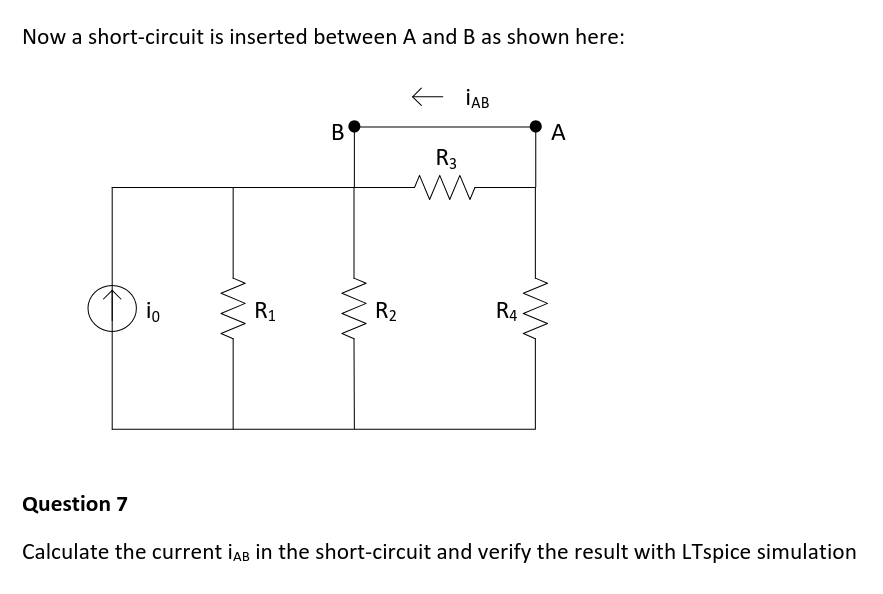

In [5]:
from sympy import *

# ohms
R1 = 289
R2 = 361
R3 = 529
R4 = 121

i0 = 0.841 # A

VA, VB, iAB = sp.symbols('VA VB iAB', real=True)
eqA = sp.Eq(VA/R4 + (VA - VB)/R3 + iAB, 0)             # 1
eqB = sp.Eq(VB/R1 + VB/R2 + (VB - VA)/R3 - iAB, i0)     # 2
eqS = sp.Eq(VA, VB)                                     # Connect/short this thing VA = VB

sol = sp.solve((eqA, eqB, eqS), (VA, VB, iAB))
i_ab = sol[iAB]

print(f"i_AB = {N(i_ab, 3)} A")

i_AB = -0.479 A


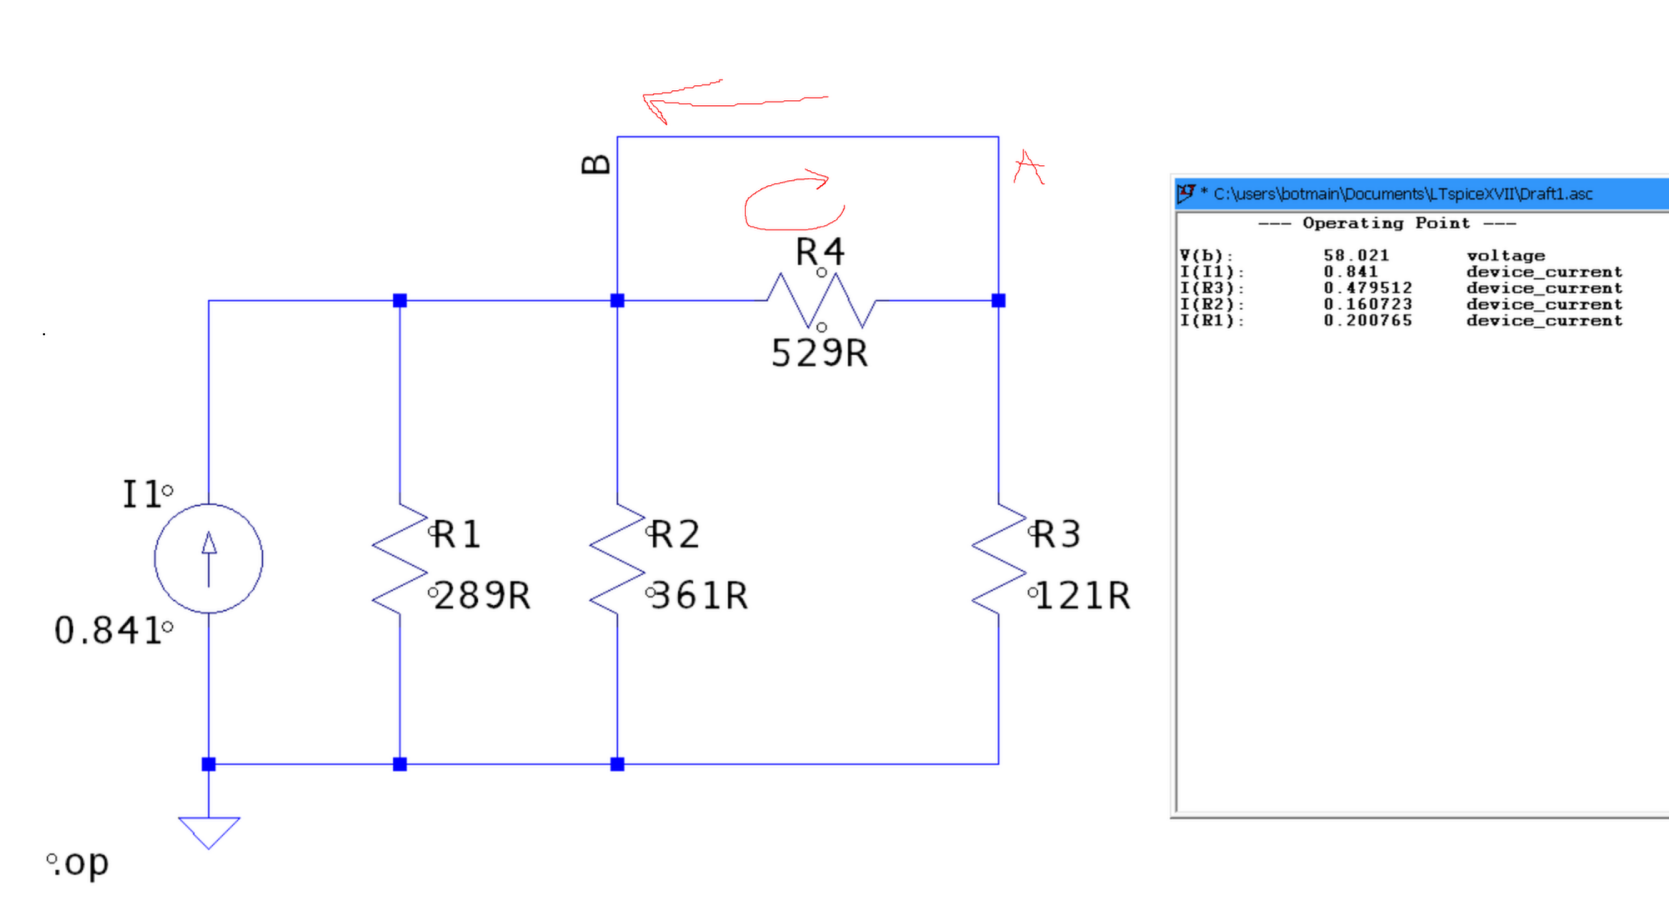 \
Is negative beause it was calculated with clockwise, and question wanted from A to B